In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data_science_week1.csv", index_col = "customerID")

In [3]:
df.shape

(7043, 20)

In [4]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
df.isnull().sum(axis = 0)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [8]:
df["TotalCharges"].head()

customerID
7590-VHVEG      29.85
5575-GNVDE    1889.50
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
Name: TotalCharges, dtype: float64

In [9]:
df = df.dropna()
df.isnull().sum().sum()

0

In [10]:
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [11]:
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [12]:
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df['Partner'] == "Yes").astype(int)
df["Dependents_encode"] = (df['Dependents'] == 'Yes').astype(int)
df["PhoneService_encode"] = (df['PhoneService'] == 'Yes').astype(int)
df["PaperlessBilling_encode"] = (df['PaperlessBilling']=="Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [13]:
df.isnull().sum(axis=0)

gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
PhoneService               0
MultipleLines              0
InternetService            0
OnlineSecurity             0
OnlineBackup               0
DeviceProtection           0
TechSupport                0
StreamingTV                0
StreamingMovies            0
Contract                   0
PaperlessBilling           0
PaymentMethod              0
MonthlyCharges             0
TotalCharges               0
Churn                      0
gender_encode              0
Partner_encode             0
Dependents_encode          0
PhoneService_encode        0
PaperlessBilling_encode    0
dtype: int64

In [14]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [15]:
df["Churn"].value_counts(1)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

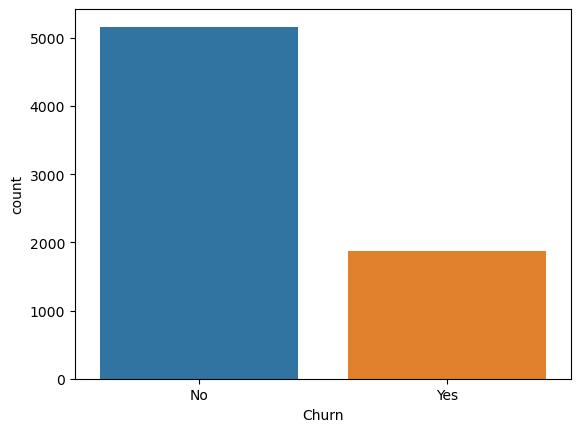

In [16]:
sns.countplot(data=df, x = "Churn")

In [17]:
# 열을 기준으로 데이터 타입이 number인 것만 feature_names에 넣는다.
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

In [18]:
label_name = "Churn"
label_name

'Churn'

In [19]:
X = df[feature_names]
y = df[label_name]

In [20]:
display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

((7032, 9), (7032,))

In [21]:
df.shape

(7032, 25)

In [22]:
split_count = int(df.shape[0] * 0.8)
split_count

5625

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 9), (1407, 9), (5625,), (1407,))

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 8,
                               max_features = 0.9,
                               random_state = 42)
model

DecisionTreeClassifier(max_depth=8, max_features=0.9, random_state=42)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, max_features=0.9, random_state=42)

In [27]:
y_predict = model.predict(X_test)
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

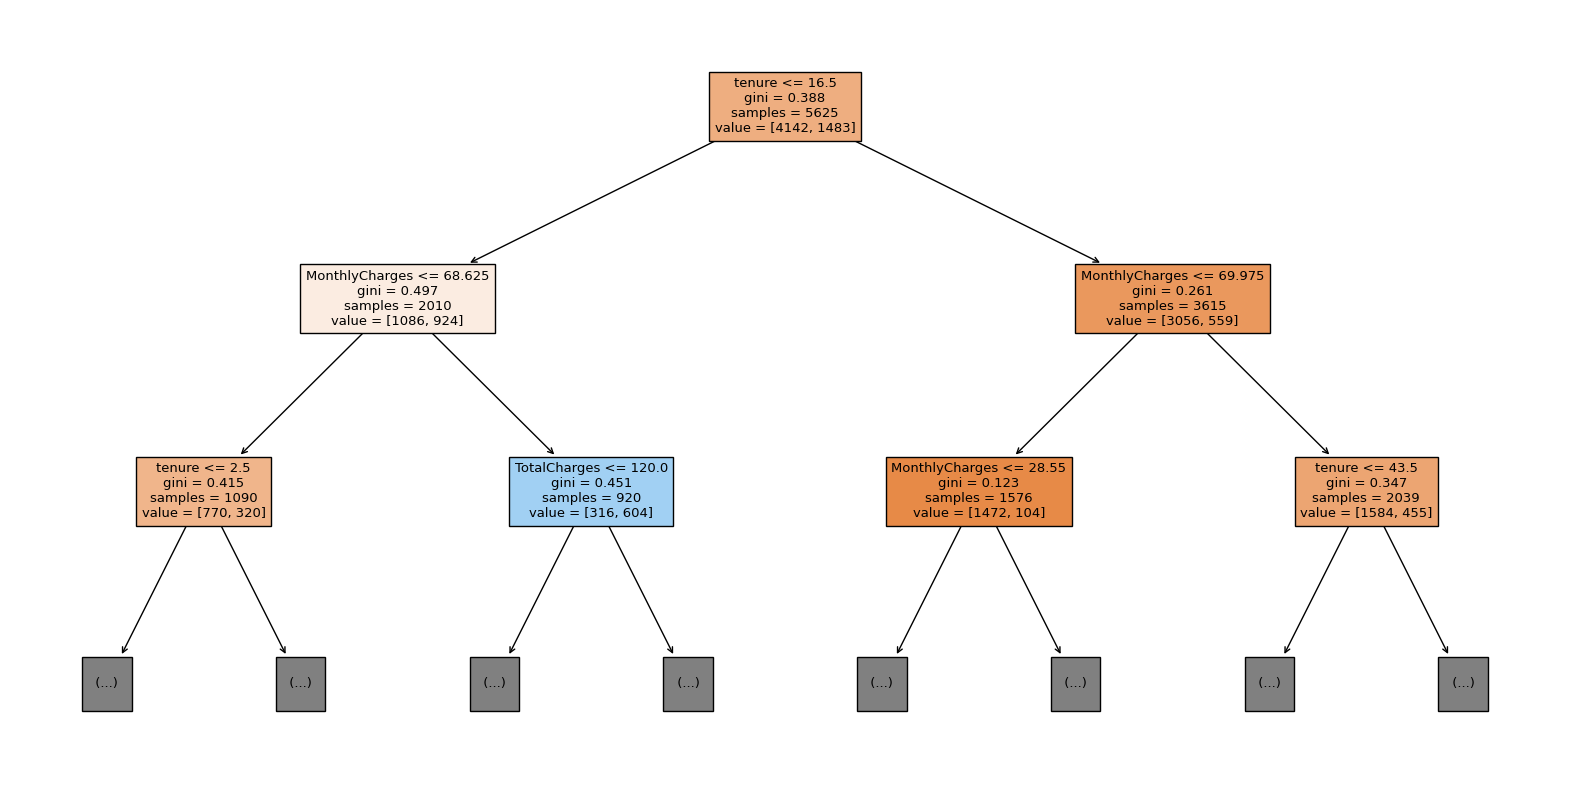

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(model, max_depth = 2, filled = True, feature_names = feature_names)
plt.show()

In [30]:
from scipy.stats import uniform, randint
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth' : randint(10,50),
          'min_samples_split' : randint(2,25),
          'min_samples_leaf' : randint(1,25),
         }

In [36]:
model.feature_importances_
model.score(X_test, y_test)

0.7505330490405118

In [31]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(), params, n_jobs=-1)
gs.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CCAEF482D0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CCAEEDE250>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CCAEF38F90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CCAEF37D10>})

In [32]:
print(gs.best_params_)

{'max_depth': 38, 'min_impurity_decrease': 0.0006255605626348889, 'min_samples_leaf': 23, 'min_samples_split': 17}


In [33]:
print(np.max(gs.cv_results_['mean_test_score']))

0.7921777777777779


In [34]:
dt = gs.best_estimator_
print(dt.score(X_test, y_test))

0.7683013503909026
